# Regression Model

## Import libraries

In [1]:
import random
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns

import matplotlib.pyplot as plt

## Configuration

In [2]:
seed = 4
np.random.seed(seed)
random.seed(seed)

## Helpers

In [3]:
def split_dataset(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    return df.drop(['score'], axis=1), df['score']

In [4]:
def plot_corr_matrix(df: pd.DataFrame, columns: list[str]) -> None:
    data = df[['win', *columns]]
    sns.heatmap(data=data.corr(), annot=True, fmt='.3f')
    plt.show()

## Work with dataset

### Read data

In [5]:
df = pd.read_csv('../logs/stats.csv')
df.head()

,algorithm,elapsed,score,win
0,minimax with alpha-beta pruning,23.720956,-194,False
1,expectimax,14.197597,455,True
2,player,11.017905,487,True
3,a_star,4.886523,490,True
4,minimax with alpha-beta pruning,15.634230,855,True


### Split dataset

In [6]:
train_df, test_df = df.iloc[:-5], df.iloc[-5:]

## EDA

### Win percent and total score

In [7]:
win_percent = df['win'].sum() / len(df) * 100
total_score = df['score'].sum()
print(f'Win percent: {win_percent:.2f}%\nTotal Score: {total_score}')

Win percent: 36.67%
Total Score: -3828


### Number of records

In [8]:
print(f'There are {df.shape[0]} records')

There are 60 records


### Algorithms distribution

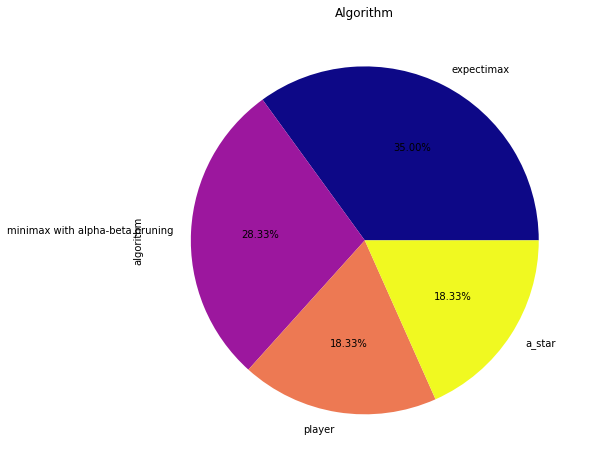

In [9]:
fgr = plt.figure(figsize=(8, 8))
_ = df.algorithm.value_counts().plot.pie(
    title="Algorithm",
    autopct="%1.2f%%",
    cmap="plasma",
)

### Average game duration

In [10]:
print(f"Average duration is equal to {df['elapsed'].mean():.2f}s")

Average duration is equal to 14.65s


### Corelation between values

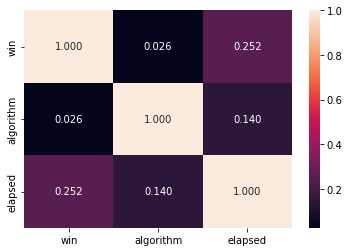

In [11]:
encoder = OrdinalEncoder()
columns = ['win', 'algorithm', 'elapsed']
plot_df = pd.DataFrame(encoder.fit_transform(df[columns]), columns=columns)
plot_corr_matrix(plot_df, columns[1:])

## Transform datasets

### Split train data

In [12]:
x, y = split_dataset(train_df)
x_train, x_correct, y_train, y_correct = train_test_split(
    x, y, test_size=0.25, shuffle=True, random_state=seed
)

### Split test data

In [13]:
x_test, y_test = split_dataset(test_df)

### Encode datasets

In [14]:
encoder = OrdinalEncoder()
categorical = ['algorithm', 'win'] # str, bool

In [15]:
x_train[categorical] = encoder.fit_transform(x_train[categorical])
x_correct[categorical] = encoder.transform(x_correct[categorical])
x_test[categorical] = encoder.fit_transform(x_test[categorical])

## Regression model

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([  23.01024444,    7.5619612 , 1074.99426988])

In [17]:
print("Score:", model.score(x_correct, y_correct))

Score: 0.8198581311006602


## Prediction

In [18]:
y_pred = model.predict(x_test)
print("Score:", model.score(x_test, y_pred))

Score: 1.0


## Statistics

In [23]:
pd.DataFrame({
    "y_true - y_pred": np.abs(y_test - y_pred),
    "y_true - y_mean": np.abs(y_test - y_train.mean())
}).reset_index(drop=True)

,y_true - y_pred,y_true - y_mean
0,37.938628,759.95122
1,253.256464,205.04878
2,150.314583,242.04878
3,46.506652,664.95122
4,213.483248,134.04878
